In [1]:
%pylab inline
from __future__ import division
import scipy as sp
from scipy import stats
from scipy.signal import argrelextrema
from scipy.interpolate import interp1d
import operator as op
from decimal import *
import pickle
import mpld3
mpld3.enable_notebook()

Populating the interactive namespace from numpy and matplotlib


In [2]:
%run ../cow.py

In [63]:
# 21 from Hamming Code
# Quantize by 21 (to get all possible RS blocklengths)
# 1400 = min bits for one phase, 4200 = entire protocol
# hs_rs_table(op_SNR, rate, blocklength)
class node_table():
    op_SNR = arange(-2.5, 11, 0.01)
#     padd = 0.1*10**(-9)
    
    # num_nodes = n
    def __init__(self, n, down=True):
        self.num_node = n
        minb = n * 160 * 7 / 4
#         quantize = (20000-minb*2)/100
        bitrange = arange(minb, 3*1400-minb, 21)
        self.bitrange = bitrange
#         rate = num_node * 160 / bitrange * 7 / 4
#         blocklength = bitrange / 21
        num_tables = len(bitrange)
#         print('num tables', num_tables)
#         print('the blocklength range', floor(bitrange/21))
        self.tables = {}
        for b in self.bitrange:
#             b = int(bitrange[bidx])
            block = b/21 if down else b/21/n
            self.tables[b] = hs_rs_table(self.op_SNR, n*160/b, int(block))
#             codetable = self.tables[b]
#             actualSNR = codetable[0][np.where(np.array(codetable[1])<=self.padd)[0][0]]
#             print(b, actualSNR)

5.0

In [48]:
filepath_down = '../data_tables/short_block_test/down/n'
filepath_up = '../data_tables/short_block_test/up/n'

In [49]:
%%time
for num_nodes in arange(5, 0, -1):
    node = node_table(num_nodes)
    filename = filepath_down + str(num_nodes) + '.in'
    save_table(node, filename)

CPU times: user 11min 52s, sys: 10.5 s, total: 12min 3s
Wall time: 13min 37s


In [51]:
%%time
for num_nodes in arange(5, 0, -1):
    node = node_table(num_nodes, False)
    filename = filepath_up + str(num_nodes) + '.in'
    save_table(node, filename)

CPU times: user 3min 49s, sys: 2.41 s, total: 3min 51s
Wall time: 3min 54s


In [42]:
for b in node.bitrange:
    print b, node.tables[b][1][-1]
print type(node.tables[1400][1])

1400.0 3.01444869022e-10
1421.0 3.06012215521e-10
1442.0 3.10579562021e-10
1463.0 4.89390944154e-20
1484.0 5.03784795451e-20
1505.0 5.44560467706e-30
1526.0 5.68237009778e-30
1547.0 4.73648695592e-40
1568.0 5.00714335338e-40
1589.0 3.43040380123e-50
1610.0 3.6719815337e-50
1631.0 2.15230554123e-60
1652.0 2.33166433632e-60
1673.0 1.20187428127e-70
1694.0 1.31712250001e-70
1715.0 6.09095177733e-81
1736.0 6.74943305053e-81
1757.0 2.8429343916e-91
1778.0 3.18408651858e-91
1799.0 1.23614024566e-101
1820.0 1.39879027797e-101
1841.0 5.05292827009e-112
1862.0 5.77477516579e-112
1883.0 1.95617543677e-122
1904.0 2.25712550396e-122
1925.0 7.21635199098e-133
1946.0 8.40385295149e-133
1967.0 2.54974834191e-143
1988.0 2.99595430173e-143
2009.0 8.66625555154e-154
2030.0 1.02711176907e-153
2051.0 2.84402505265e-164
2072.0 3.39895677023e-164
2093.0 9.04057128144e-175
2114.0 1.08922545559e-174
2135.0 2.79145487451e-185
2156.0 3.38962377618e-185
2177.0 8.39264941193e-196
2198.0 1.02686533981e-195
2219.0 

In [27]:
minb = 5 * 160 * 7 / 4
#         quantize = (20000-minb*2)/100
bitrange = arange(minb, 3*1400-minb, 21)
print bitrange
print len(bitrange)

[ 1400.  1421.  1442.  1463.  1484.  1505.  1526.  1547.  1568.  1589.
  1610.  1631.  1652.  1673.  1694.  1715.  1736.  1757.  1778.  1799.
  1820.  1841.  1862.  1883.  1904.  1925.  1946.  1967.  1988.  2009.
  2030.  2051.  2072.  2093.  2114.  2135.  2156.  2177.  2198.  2219.
  2240.  2261.  2282.  2303.  2324.  2345.  2366.  2387.  2408.  2429.
  2450.  2471.  2492.  2513.  2534.  2555.  2576.  2597.  2618.  2639.
  2660.  2681.  2702.  2723.  2744.  2765.  2786.]
67


3.01444869022e-10
CPU times: user 581 ms, sys: 15.1 ms, total: 596 ms
Wall time: 608 ms


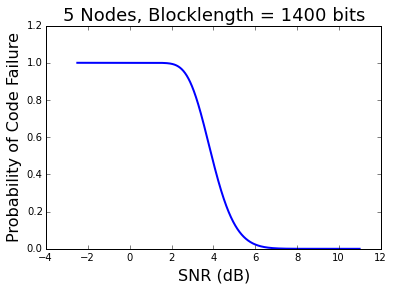

In [31]:
%%time
n = 5
op_SNR = arange(-2.5, 11, 0.01)
b = 1400
testb = hs_rs_table(op_SNR, n*160/b, int(b/21))
plot(testb[0], testb[1], lw=2.0)
xlabel('SNR (dB)', fontsize=16)
ylabel('Probability of Code Failure', fontsize=16)
title('{0} Nodes, Blocklength = {1} bits'.format(n, b), fontsize=18)
print testb[1][-1]

3.01444869022e-10
5.93755045114e-11
5.93755045114e-11


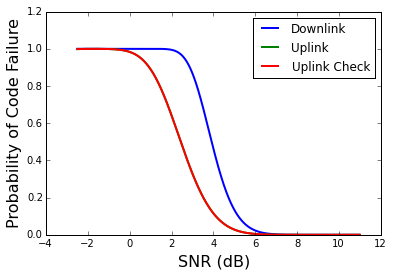

In [71]:
# n = 5 --> 1400, 2786
# n = 1 --> 280, 3913
table = load_table(filepath_down + str(5) + '.in')
testb = table.tables[1400]
plot(testb[0], testb[1], lw=2.0, label='Downlink')
# xlabel('SNR (dB)', fontsize=16)
# ylabel('Probability of Code Failure', fontsize=16)
# title('{0} Nodes, Blocklength = {1} bits'.format(n, b), fontsize=18)
print testb[1][-1]

# figure()
table = load_table(filepath_up + str(5) + '.in')
testb = table.tables[1400]
plot(testb[0], testb[1], lw=2.0, label='Uplink')
xlabel('SNR (dB)', fontsize=16)
ylabel('Probability of Code Failure', fontsize=16)
# title('{0} Nodes, Blocklength = {1} bits'.format(n, b), fontsize=18)
print testb[1][-1]

check = hs_rs_table(op_SNR, 5*160/1400, int(1400/21/5))
plot(check[0], check[1], lw=2.0, label='Uplink Check')
print(check[1][-1])

legend()

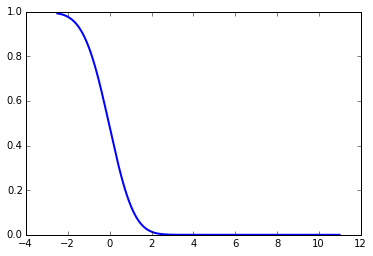